<a href="https://colab.research.google.com/github/kim-nam-keyong/Data-Science-Analytic/blob/master/House_prices_predict_values_need_to_be_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# 쥬피터에서 쓸때 확인 할 부분
# 현재는 코랩에서 진행

In [227]:
# 모듈 불러오기 ~~ 시각화도 ~
import numpy as np
import pandas as pd

# import plotly_express as px
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10) #데이터행 전체보기 : None

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/Kaggle Data/House_prices_predict_values/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Kaggle Data/House_prices_predict_values/test.csv')

In [4]:
print(df_train.head())  # nan값이 존재하는게 있네 ? 확인해보자
df_test.head()

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print(df_train.isnull().sum())   # lotFrontage - Nan 존재
print(df_test.isnull().sum())    # MsZoning , lotFrontage -Nan 존재  뒤에 train, test 합쳐서 처리하자 그냥

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [6]:
print("Shape")
print("Training data : ", df_train.shape)
print("Test data     : ", df_test.shape)

Shape
Training data :  (1460, 81)
Test data     :  (1459, 80)


In [7]:
df_train.info()   # dtype이 int64, object, float64 모두 가지고 있다. 컬럼을 좀 구분해야할듯?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# 주어진 데이터 정보 확인
data_desc = open('/content/drive/MyDrive/Kaggle Data/House_prices_predict_values/data_description.txt')
print(data_desc.read())
data_desc.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [9]:
a= (df_train.dtypes=='object')
object_cols = list(a[a].index)
print('object_columns')
print(object_cols)

b= (df_train.dtypes=='int')
int_cols = list(b[b].index)
print('int_columns')
print(int_cols)

c= (df_train.dtypes=='float')
float_cols = list(c[c].index)
print('float_columns')
print(float_cols)



object_columns
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
int_columns
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '

In [10]:
## 흠... 일단 결측치를 확인해보자 ... train, test 를 합쳐서 결측치를 어떻게 바꿀지 고민을 해봅시다.

df = [df_train, df_test]
df_combined = pd.concat(df).reset_index(drop=True)
df_combined

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [11]:
# 결측치 확인  꽤 많은 컬럼에서 결측치 가진 것으로 확인 , 결측치를 시각화 한번 해봅시다.
print(df_combined.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64


<Axes: title={'center': 'missing values heatmap'}>

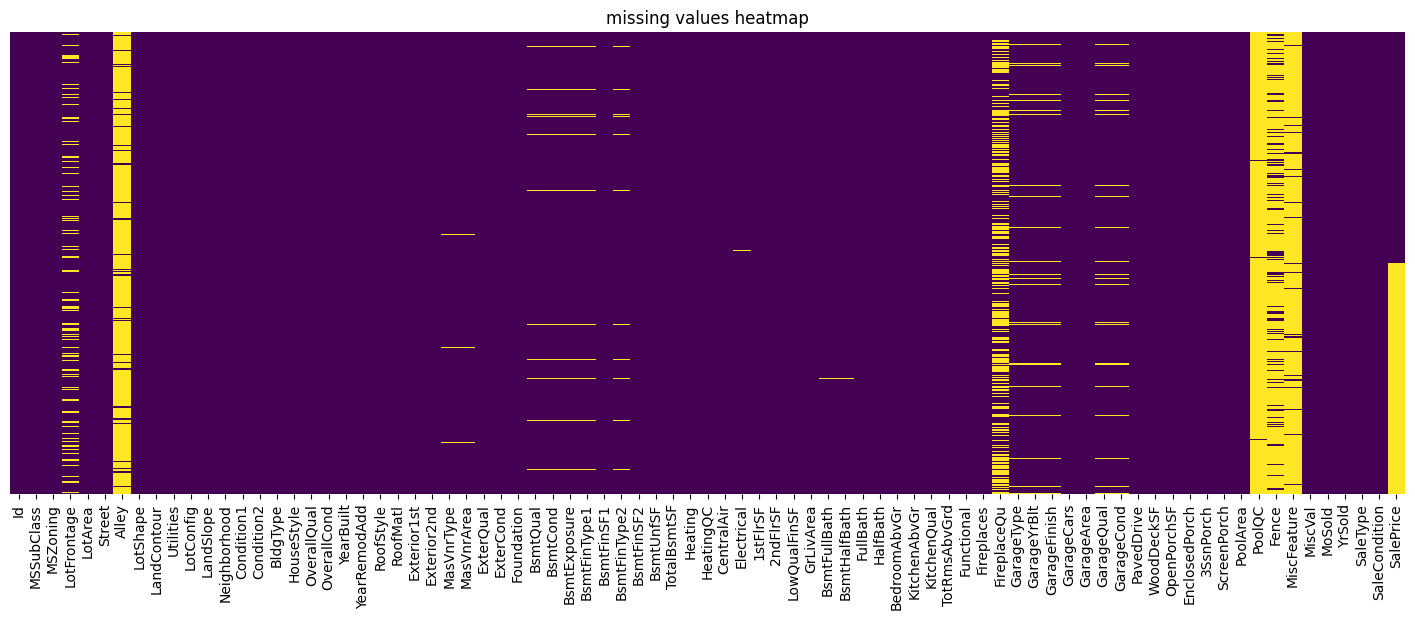

In [12]:
plt.figure(figsize=(18,6))
plt.title('missing values heatmap')
sns.heatmap(df_combined.isnull(),yticklabels=False, cbar=False , cmap='viridis')

#yticklabel , 시각화 공간 절약함 , cbar= 누락된 값의 위치만 확인한다 False


<Axes: title={'center': 'the unique values of object cols'}>

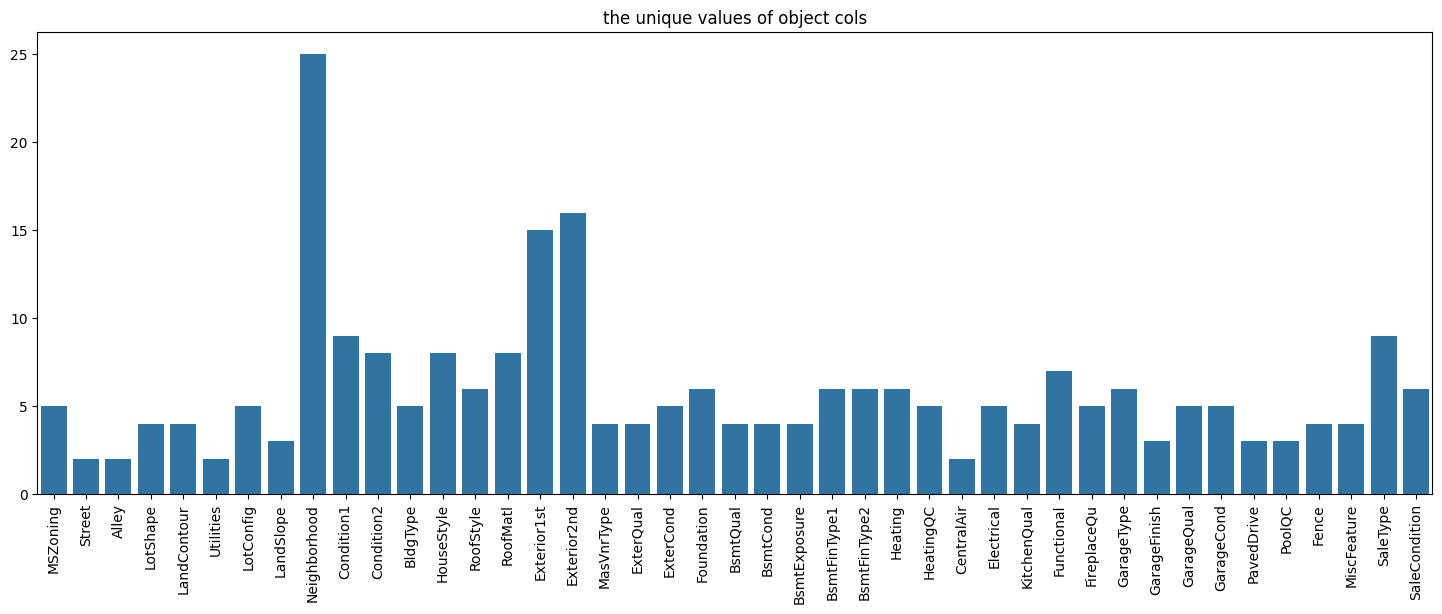

In [13]:
unique_values = []
for col in object_cols:
  unique_values.append(df_combined[col].nunique())

plt.figure(figsize=(18,6))
plt.title('the unique values of object cols')
plt.xticks(rotation=90)
sns.barplot(x=object_cols, y=unique_values)

In [14]:
df_combined.describe()  ## 몇몇 컬럼들이 min~50% 까지 0값으로 되있는것이 보이지만 object 컬럼값에 Nan이 많이 분포해있어 먼저 데이터 처리
#df_combined[int_cols].isnull().sum()
#df_combined[float_cols].isnull().sum()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


<ipython-input-15-ccbb6dabf28e>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11,4,index)


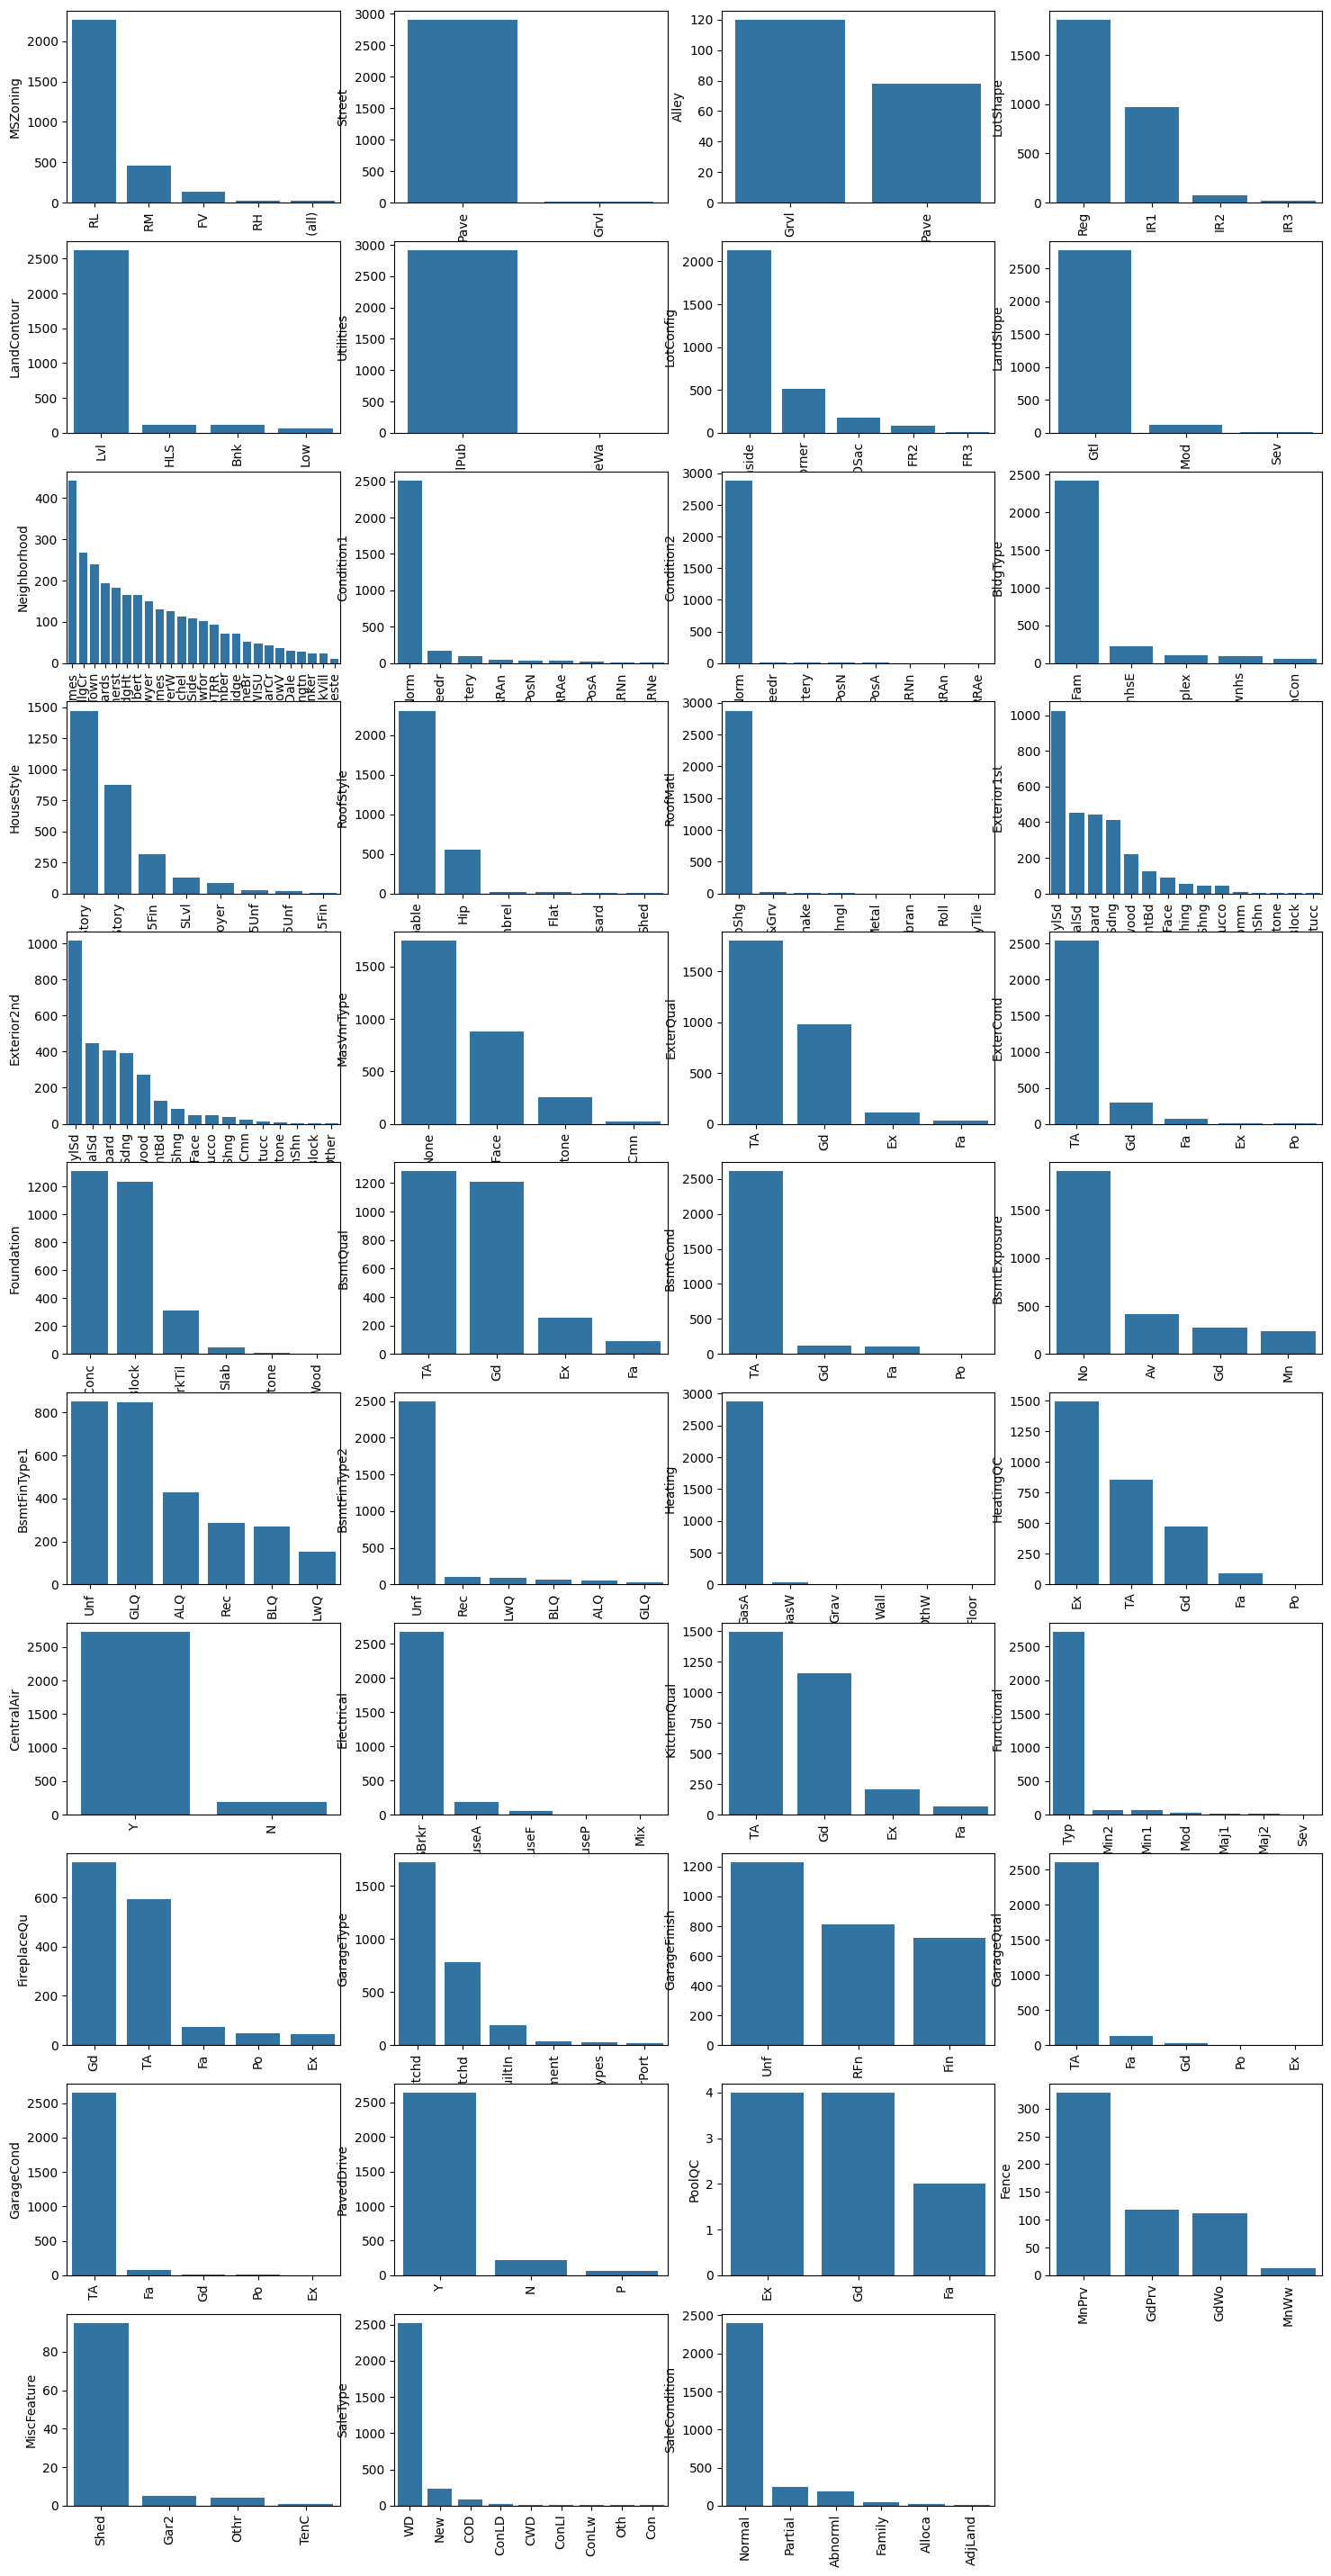

In [15]:
# categorical features 들의 데이터 분포를 확인하여 결측치 처리방법을 정함
plt.figure(figsize=(18,36))
plt.title('Categorical Features Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
  y = df_combined[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index),y=y)
  index += 1

  #

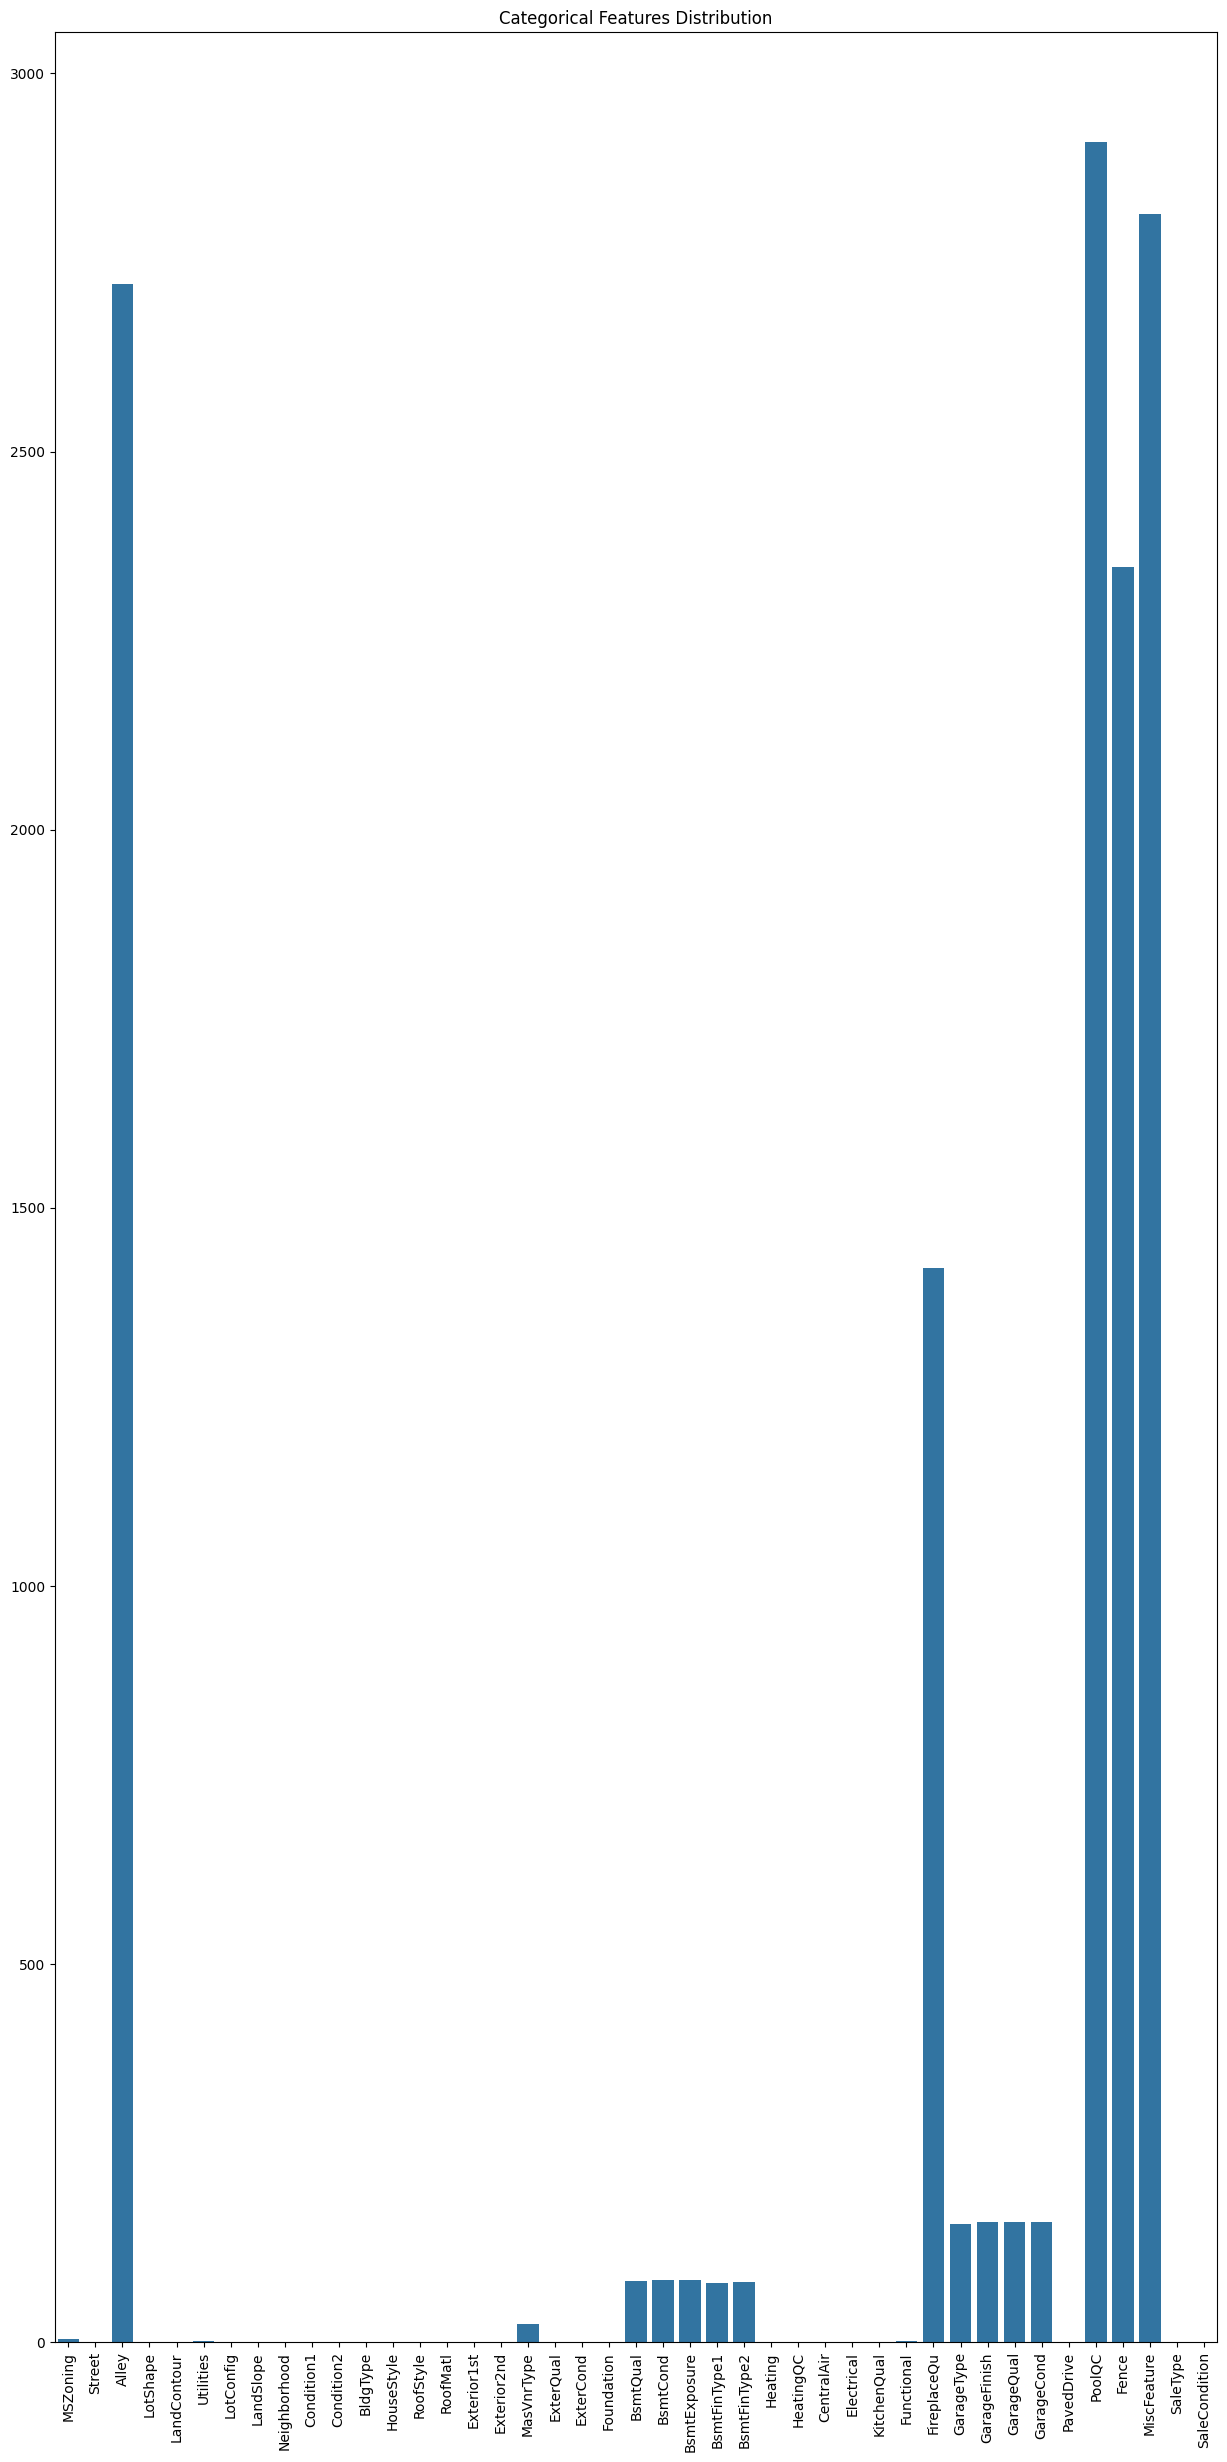

In [52]:
# a= (df_train.dtypes=='object')
# object_cols = list(a[a].index)
# print('object_columns')
# print(object_cols)

# b= (df_train.dtypes=='int')
# int_cols = list(b[b].index)
# print('int_columns')
# print(int_cols)

# c= (df_train.dtypes=='float')
# float_cols = list(c[c].index)
# print('float_columns')
# print(float_cols)


plt.figure(figsize=(15,30))
plt.title('Categorical Features Distribution')
plt.xticks(rotation=90)

missing_values = {x: df_combined[x].isnull().sum() for x in object_cols}
sns.barplot(x=list(missing_values.keys()), y=list(missing_values.values()))
plt.show()

In [136]:
# alley , FireplaceQu, PoolQC, fence, Miscfeature   유의미한 Nan값을 보인다.
# 연관성이 있는 데이터 컬럼들의 관계를 비교하는 과정도 진행한다 .
#df_combined['Fence'].value_counts().sum()   Nan값 압도적 = fence,alley
#df_combined['Alley'].unique()
#df_combined['Utilities'].value_counts()   #  Utilities 값은 Nosewa 1개만 존재하고 나머지는 모두 동일값 컬럼제거
df_combined['FireplaceQu'].isnull().sum()


1420

In [137]:
## FireplaceQu = Nan 값에따른 Fireplaces값은 모두 0이다 이에 근거하여  Nan 값을 No Fireplace 란 의미인 NA로 대신 채운다
a = df_combined.groupby(['FireplaceQu','Fireplaces'],as_index=False).size()
b = df_combined.loc[df_combined['FireplaceQu'].isna()]
b.Fireplaces.value_counts()
df_combined.loc[(df_combined['PoolQC'].isnull()) & df_combined['PoolArea']>0][['PoolQC','PoolArea']]
# df_combined['Fireplaces'].isnull().sum() # Nan 값 없는것 확인
# 그러나  poolarea가 0보다 큰데 poolqc가 nan 값이 하나 나오는걸 확인 이것을 정제해야함 !

,PoolQC,PoolArea
2599,NaN,561


In [138]:
# PoolQC 항목에는 값들이 있던 것들이 사실상 Area가 0이다 데이터정의에 대한 모순이 생기므로 0값에 해당하는 poolqc값들을 NA로 처리한다.

a = df_combined.groupby(['PoolQC','PoolArea'],as_index=False).size()
b = df_combined.loc[df_combined['PoolQC'].isna()]
b.PoolArea.value_counts()


0      2906
368       1
444       1
561       1
Name: PoolArea, dtype: int64

In [139]:
#결측치 값을 만들어놓은것을 확인하고 채워갑시다
missing_values

{'MSZoning': 4,
 'Street': 0,
 'Alley': 2721,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 2,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'MasVnrType': 24,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 81,
 'BsmtCond': 82,
 'BsmtExposure': 82,
 'BsmtFinType1': 79,
 'BsmtFinType2': 80,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 1,
 'KitchenQual': 1,
 'Functional': 2,
 'FireplaceQu': 1420,
 'GarageType': 157,
 'GarageFinish': 159,
 'GarageQual': 159,
 'GarageCond': 159,
 'PavedDrive': 0,
 'PoolQC': 2909,
 'Fence': 2348,
 'MiscFeature': 2814,
 'SaleType': 1,
 'SaleCondition': 0}

In [207]:
## 특별히 심해 보이는것들로 일단 1차 모델링 진행해보고 나머지 NAn값들을 제거 했을때 성능이 증가하는지 확인과정 진행예정
## 기본적으로 정수, 실수형은 평균으로 채우고 ,  범주형은 최빈값으로 채웁니다.
# drop 컬럼들 제거
#df_combined.drop(columns=['Id','Alley','Fence','MiscFeature','SalePrice','Utilities'],inplace=True); print('Drop Id ,Alley, Fence, MiscFeature, Saleprice ,Utilities \n')

#Nan값들이 그렇게 많지 않은 것들은 범주형 컬럼 최빈값 대체 //
# 그러나  Bsmt, Garage 관련된 것들은 따로 확인할 예정 서로간 상관관계를 확인해봐야함
df_combined['MSZoning']=df_combined['MSZoning'].fillna(df_combined['MSZoning'].mode()[0])  # 범주형
df_combined['LotFrontage'] = df_combined['LotFrontage'].fillna(df_combined['LotFrontage'].mean())  # 실수
df_combined['Exterior1st'] = df_combined['Exterior1st'].fillna(df_combined['Exterior1st'].mode()[0])
df_combined['Exterior2nd'] = df_combined['Exterior2nd'].fillna(df_combined['Exterior2nd'].mode()[0])
df_combined['MasVnrType'] = df_combined['MasVnrType'].fillna(df_combined['MasVnrType'].mode()[0])
df_combined['Electrical'] = df_combined['Electrical'].fillna(df_combined['Electrical'].mode()[0])
df_combined['KitchenQual'] = df_combined['KitchenQual'].fillna(df_combined['KitchenQual'].mode()[0])
df_combined['MasVnrArea'] = df_combined['MasVnrArea'].fillna(df_combined['MasVnrArea'].mean())
df_combined['Functional'] = df_combined['Functional'].fillna(df_combined['Functional'].mode()[0]); print('substitute missingvalue for mode')
df_combined.at[2599,'PoolQC'] = df_combined['PoolQC'].mode()[0] ; print('Non zero poolarea but PoolQC is Nan => use mode ')

# 범주형 NA or 최빈값 으로 채워야 할 것들 !
df_combined['FireplaceQu'] = df_combined['FireplaceQu'].fillna('NA'); print('FireplaceQu: fill Na')
df_combined['PoolQC'] = df_combined['PoolQC'].fillna('NA') ; print('PoolQC: substitute NaN for NA')
df_combined['SaleType'].fillna(df_combined['SaleType'].mode()[0], inplace=True)




substitute missingvalue for mode
Non zero poolarea but PoolQC is Nan => use mode 
FireplaceQu: fill Na
PoolQC: substitute NaN for NA


In [174]:
# basement feature 확인
#total bsmtSF 가 없으면 당연히 나머지 관련된 것들도 없어야 한다 없는 것 확인
#df_combined.loc[df_combined['TotalBsmtSF'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']]
df_bsmt = df_combined.loc[df_combined['BsmtQual'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']]
df_bsmt_real = df_bsmt.select_dtypes(exclude='object').columns
df_bsmt_real

Index(['BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath'],
      dtype='object')

In [199]:
#수치형, 범주형 확인해서 0은 실수표현보단 정수로 표현해서 모델링 시간을 조금이라도 줄여보는 느낌
df_combined['BsmtQual']=df_combined['BsmtQual'].fillna('NA')
df_combined['BsmtCond']=df_combined['BsmtCond'].fillna('NA')
df_combined['BsmtExposure']=df_combined['BsmtExposure'].fillna('NA')
df_combined['BsmtFinType1']=df_combined['BsmtFinType1'].fillna('NA')
df_combined['BsmtFinType2']=df_combined['BsmtFinType2'].fillna('NA')

df_combined['BsmtFinSF1']=df_combined['BsmtFinSF1'].fillna(int(0))
df_combined['BsmtFinSF2']=df_combined['BsmtFinSF2'].fillna(int(0))
df_combined['BsmtUnfSF']=df_combined['BsmtUnfSF'].fillna(int(0))
df_combined['TotalBsmtSF']=df_combined['TotalBsmtSF'].fillna(int(0))
df_combined['BsmtHalfBath']=df_combined['BsmtHalfBath'].fillna(int(0))
df_combined['BsmtFullBath']=df_combined['BsmtFullBath'].fillna(int(0))

In [202]:
df_combined.loc[df_combined['GarageCond'].isnull()][['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0.0,0.0,NaN,NaN
48,NaN,NaN,NaN,0.0,0.0,NaN,NaN
78,NaN,NaN,NaN,0.0,0.0,NaN,NaN
88,NaN,NaN,NaN,0.0,0.0,NaN,NaN
89,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [204]:
 # garageArea 면적이 없는데 garage type 이 있는게 존재한다!! at[2576,'GarageType'] NA로 바꿔준다!
df_combined.loc[df_combined['GarageArea'].isnull()][['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']].head()
df_combined.at[2576,'GarageType'] = 'NA'
df_combined['GarageType'] = df_combined['GarageType'].fillna('NA')
df_combined['GarageFinish'] = df_combined['GarageFinish'].fillna('NA')
df_combined['GarageQual'] = df_combined['GarageQual'].fillna('NA')
df_combined['GarageCond'] = df_combined['GarageCond'].fillna('NA')

df_combined['GarageYrBlt'] = df_combined['GarageYrBlt'].fillna(int(0))
df_combined['GarageCars'] = df_combined['GarageCars'].fillna(int(0))
df_combined['GarageArea'] = df_combined['GarageArea'].fillna(int(0))

In [208]:
#결측치 없는 것 확인 !  MasVnrArea 이게 결측치가 나오던데 이거 다시 확인해서 변경해야함
# 결측치 컬럼이 상세히 나온건 object로만 해놔서 나머지 int, float 컬럼들도 결측치 컬럼 제대로 구분해야함
df_combined.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [209]:
from sklearn.preprocessing import OneHotEncoder

In [244]:
object_cols = df_combined.select_dtypes(include='object').columns

OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df_combined[object_cols]))
OH_cols.index = df_combined.index
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)
df_final = df_combined.drop(object_cols, axis=1)
df_final = pd.concat([df_final,OH_cols],axis=1)

In [246]:
df_final.shape

(2919, 287)

In [316]:
print('df_final shape:', df_final.shape)
print('df_train shape:', df_train.shape)
print('df_test shape:',  df_test.shape)

X_Train = pd.DataFrame(df_final[:1460])
X_Test  = pd.DataFrame(df_final[1460:])
Y_Train = df_train['SalePrice']

print('\n features 의 숫자가 맞는지 확인:\n')
print('X_Train shape', X_Train.shape)
print('Y_Train shape:', Y_Train.shape)
print('X_Test shape:',  X_Test.shape)

df_final shape: (2919, 287)
df_train shape: (1460, 81)
df_test shape: (1459, 80)

 features 의 숫자가 맞는지 확인:

X_Train shape (1460, 287)
Y_Train shape: (1460,)
X_Test shape: (1459, 287)


In [303]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_Train, Y_Train, train_size=0.85, random_state=0)


In [304]:
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor()
model_RF.fit(X_train,Y_train)
Y_pred = model_RF.predict(X_val)
print(mean_absolute_error(Y_val,Y_pred))   # 0.85 :15691 ,  0.8:17402

15691.562648401825


In [305]:
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt
model_GBR = GradientBoostingRegressor()
model_GBR.fit(X_train,Y_train)
Y_pred = model_GBR.predict(X_val)
print(mean_absolute_error(Y_val,Y_pred))  # mae 15852
print(sqrt(mean_absolute_error(Y_val,Y_pred))) #rmse 124


15749.449360206894
125.49681015948929


In [263]:
from sklearn.linear_model import SGDRegressor
model_SGD = SGDRegressor()
model_SGD.fit(X_train, Y_train)
Y_pred = model_SGD.predict(X_val)
print(mean_absolute_error(Y_val,Y_pred)) # 굉장히 오차가 큼 갖다 버림

5.449099176360087e+16


In [313]:
from xgboost import XGBRegressor

model_XGBR = XGBRegressor(learning_rate=0.1,n_estimators=400,objective='reg:squarederror')
model_XGBR.fit(X_train,Y_train)
Y_pred = model_XGBR.predict(X_val)
print(mean_absolute_error(Y_val, Y_pred)) #mae 16303

16303.686108732876


In [309]:
# 파라미터 튜닝 좀 해봅시다
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
model = XGBRegressor()

n_estimators = [100,200,300]
learning_rates = [0.01, 0.05 , 0.1  ]
objectives = ['reg:squarederror']

hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'learning_rates' : learning_rates,
    'objective' : objectives
  }

grid_cv = GridSearchCV(estimator = model,
                       param_grid = hyperparameter_grid,
                       scoring = 'neg_mean_absolute_error',
                       return_train_score = True)
grid_cv.fit(X_train,Y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rates': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300],
                         'objective': ['reg:squarederror']},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [310]:
regressor = grid_cv.best_estimator_
Y_pred = regressor.predict(X_val)
print(mean_absolute_error(Y_val,Y_pred))
print(grid_cv.best_score_)

16963.321596746577
-18192.100242337798


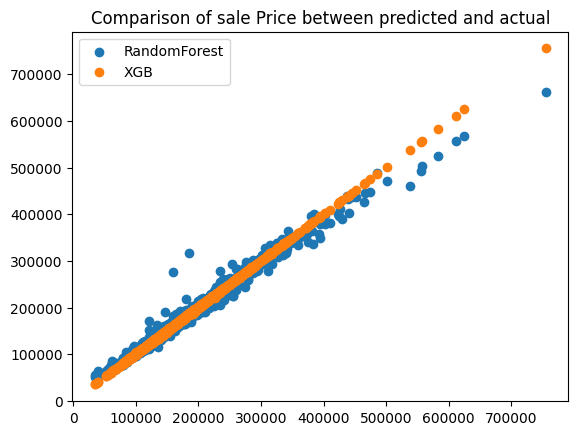

In [312]:
plt.figure()
plt.title('Comparison of sale Price between predicted and actual')
plt.scatter(Y_train,model_RF.predict(X_train),label='RandomForest')
plt.scatter(Y_train,model_XGBR.predict(X_train),label='XGB')
plt.scatter(Y_train,model_GBR.predict(X_train),label='GBR')
#plt.scatter(Y_train,regressor.predict(X_train),label='Best fit')
plt.legend()

#

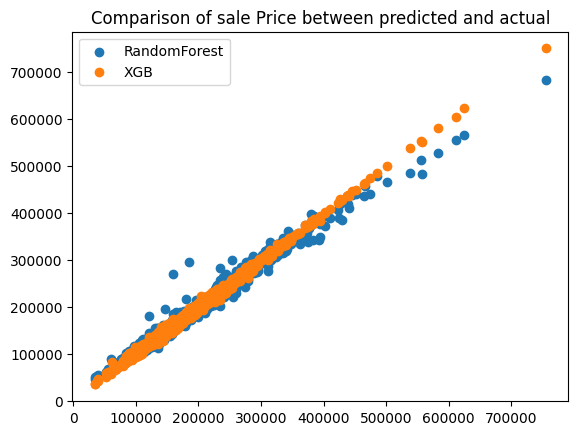

In [287]:
plt.figure()
plt.title('Comparison of sale Price between predicted and actual')
plt.scatter(Y_train,model_RF.predict(X_train),label='RandomForest')
plt.scatter(Y_train,model_XGBR.predict(X_train),label='XGB')
plt.legend()

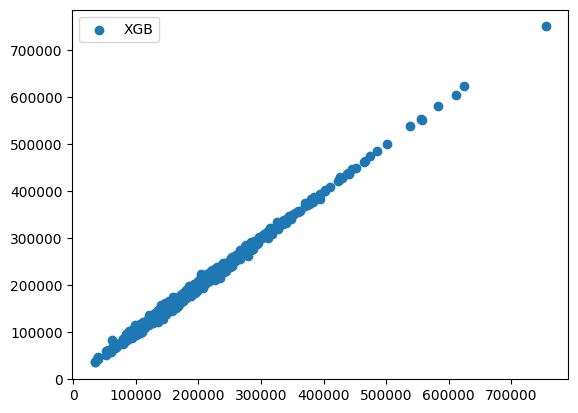

In [289]:
plt.scatter(Y_train,model_XGBR.predict(X_train),label='XGB')

plt.legend()

In [318]:
Y_pred = regressor.predict(X_Test)
Y_pred.shape

(1459,)

In [319]:
Final = pd.DataFrame()
Final['Id'] = df_test['Id']
Final['SalePrice'] = Y_pred

In [320]:
Final.head()

,Id,SalePrice
0,1461,118143.562500
1,1462,163550.046875
2,1463,186680.109375
3,1464,191421.703125
4,1465,198345.000000
